In [4]:
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
bones = tuple((i-1, j-1) for (i,j) in (
    (1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5),
    (7, 6), (8, 7), (9, 21), (10, 9), (11, 10), (12, 11),
    (13, 1), (14, 13), (15, 14), (16, 15), (17, 1), (18, 17),
    (19, 18), (20, 19), (22, 23), (21, 21), (23, 8), (24, 25),(25, 12)
))

In [34]:
with open("results/x_hat_list_256_0.01_3_False.pkl", 'rb') as fp:
    skeleton_data = pickle.load(fp)

     Left:pred,		Right:GT


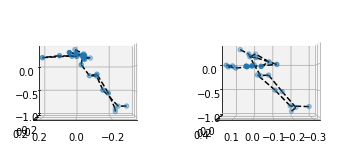

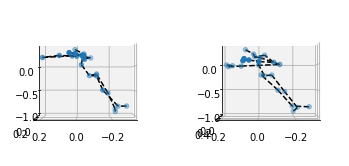

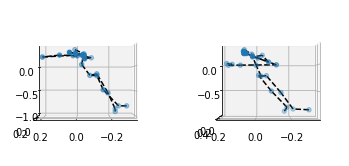

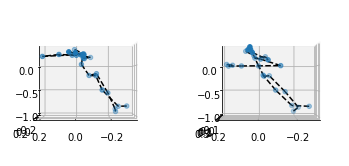

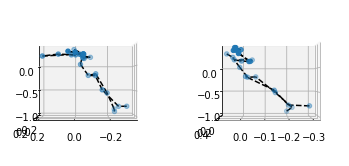

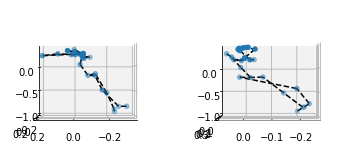

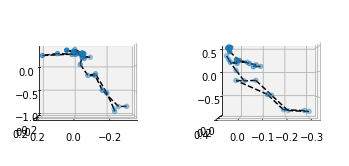

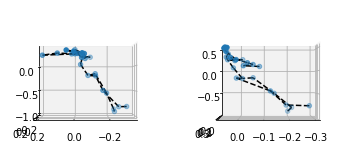

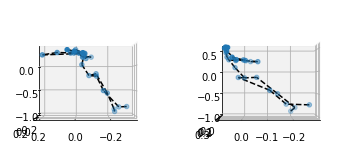

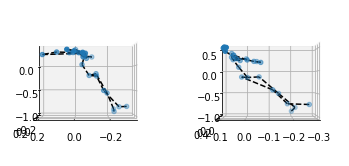

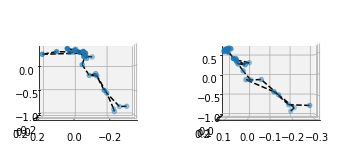

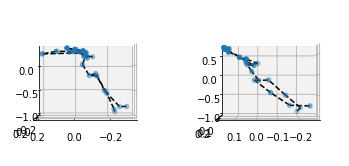

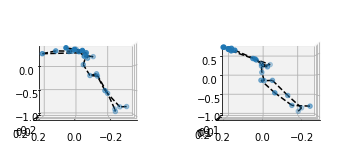

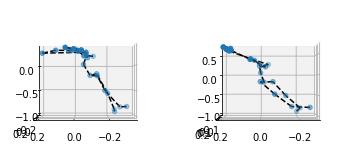

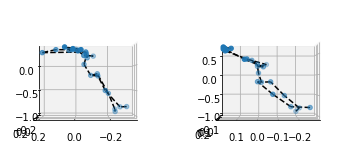

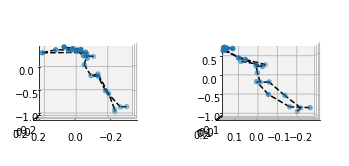

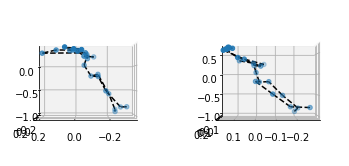

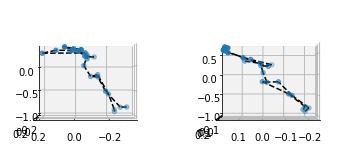

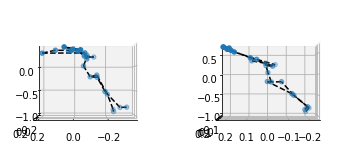

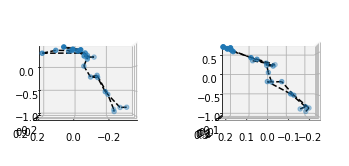

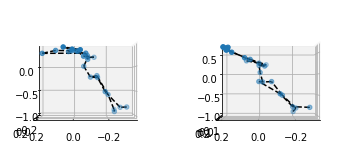

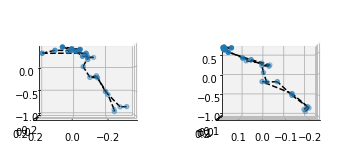

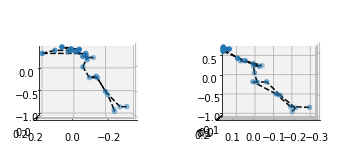

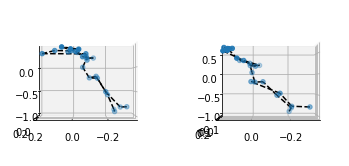

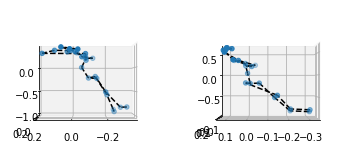

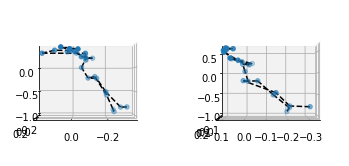

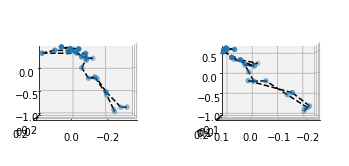

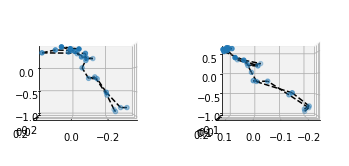

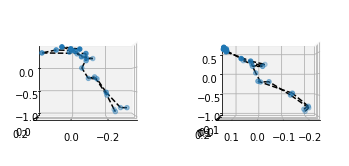

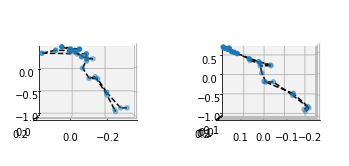

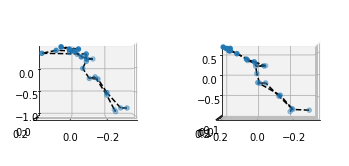

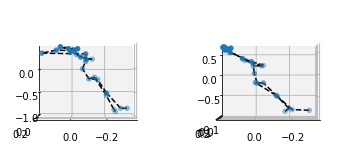

tensor([[-2.7098e-02, -3.7240e-02, -4.1163e-02, -4.1586e-02, -3.5899e-02,
         -4.1159e-02, -3.3003e-02, -1.6156e-02, -4.1300e-02, -1.3071e-02,
          1.2339e-02,  1.8132e-02, -3.5733e-02, -5.0956e-02, -4.1428e-02,
         -2.6676e-02, -1.4497e-02, -1.5849e-02, -1.9428e-02, -2.7650e-02,
         -5.2444e-02, -2.0394e-02, -1.1447e-02,  1.0763e-02,  8.2611e-03],
        [-2.2510e-02, -3.8319e-02,  1.6174e-02,  3.6947e-02,  8.3295e-03,
          4.8702e-02,  8.0994e-02,  8.3091e-02,  6.1828e-03,  2.8054e-02,
          3.6574e-02,  3.1899e-02, -3.7130e-03,  7.8159e-03,  3.5759e-02,
          6.1035e-02, -1.7814e-02, -6.3290e-03,  1.5234e-02,  2.7602e-02,
         -5.9438e-03,  7.8115e-02,  8.7748e-02,  1.7277e-02,  2.1282e-02],
        [-2.5588e-02, -3.1996e-02, -3.3869e-02, -4.4550e-02,  1.5065e-02,
          8.6918e-02,  1.4943e-01,  1.7329e-01,  3.6203e-02,  9.3530e-02,
          1.4495e-01,  1.7983e-01, -3.6959e-02, -3.6481e-02, -3.0019e-02,
         -2.8890e-02, -2.0448e-02, -

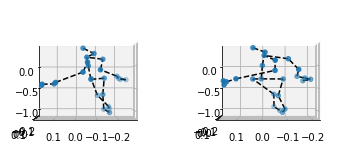

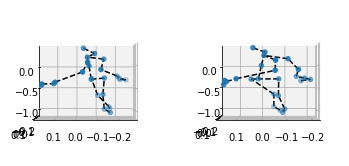

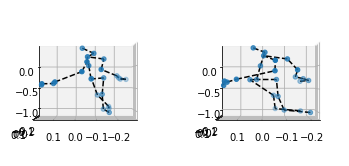

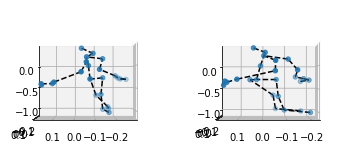

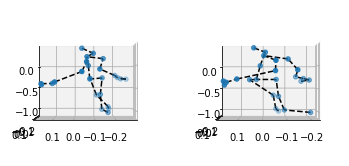

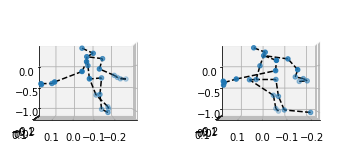

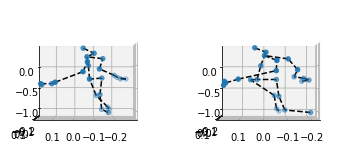

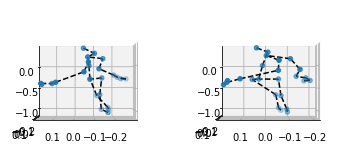

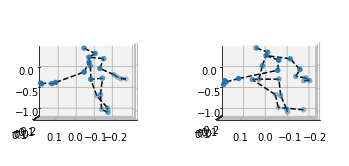

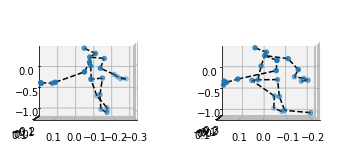

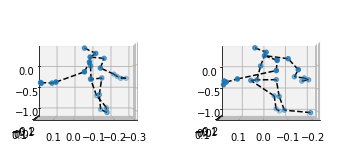

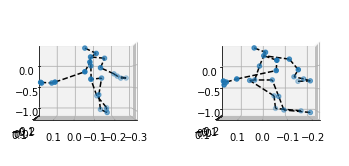

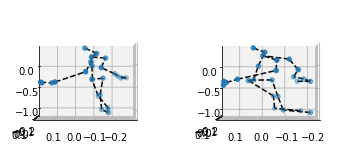

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f18378ef700> (for post_execute):


KeyboardInterrupt: 

In [43]:
skeleton = skeleton_data["x_hat"]#_hat"]
print("     Left:pred,\t\tRight:GT")
i=0
prev_skeleton = 0
for instance, gt in zip(skeleton_data["x_hat"], skeleton_data["x"]):
    for T in range(32):
#         print(instance[:,T,:,0] - prev_skeleton)
        fig = plt.figure()
        ax = fig.add_subplot(121, projection='3d')
        ax.view_init(0, 90)
#             plt.scatter(instance[0,T,:,0].detach().cpu(), instance[1,T,:,0].detach().cpu())
        for i, j in bones:
            joint_locs = instance[:,T,[i,j],0].detach().cpu()
            ax.plot(joint_locs[0],joint_locs[1],joint_locs[2], color='black', linestyle='--')
        ax.scatter(instance[0,T,:,0].detach().cpu(), instance[1,T,:,0].detach().cpu(), instance[2,T,:,0].detach().cpu())

        ax = fig.add_subplot(122, projection='3d')
        ax.view_init(0, 90)
#             plt.scatter(instance[0,T,:,0].detach().cpu(), instance[1,T,:,0].detach().cpu())
        for i, j in bones:
            joint_locs = gt[:,T,[i,j],0].detach().cpu()
            ax.plot(joint_locs[0],joint_locs[1],joint_locs[2], color='black', linestyle='--')
        ax.scatter(gt[0,T,:,0].detach().cpu(), gt[1,T,:,0].detach().cpu(), gt[2,T,:,0].detach().cpu())
        plt.show()
    print(instance[:,T,:,0] - instance[:,0,:,0])
    i+=1